In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
heart_disease<- read_csv(file = "https://raw.githubusercontent.com/Chr1zz-D/dsci-100-demo/main/heart-disease.csv")
heart_disease <- mutate(heart_disease, cp= as_factor(cp))
heart_disease_scaled<-heart_disease |>
mutate (scaled_chol= scale(chol, center= TRUE),
       scaled_oldpeak= scale(oldpeak, center=TRUE),
       scaled_thalach=scale(thalach, center= TRUE) )

heart_disease_scaled

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,scaled_chol,scaled_oldpeak,scaled_thalach
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,-0.25591036,1.0855423,0.01541728
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.07208025,2.1190672,1.63077374
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-0.81542377,0.3103986,0.97589950
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,-1.0276530,2.0329402,-0.3775073
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,-2.2238541,0.1381444,-1.5126226
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,-0.1980297,-0.8953805,1.0632161


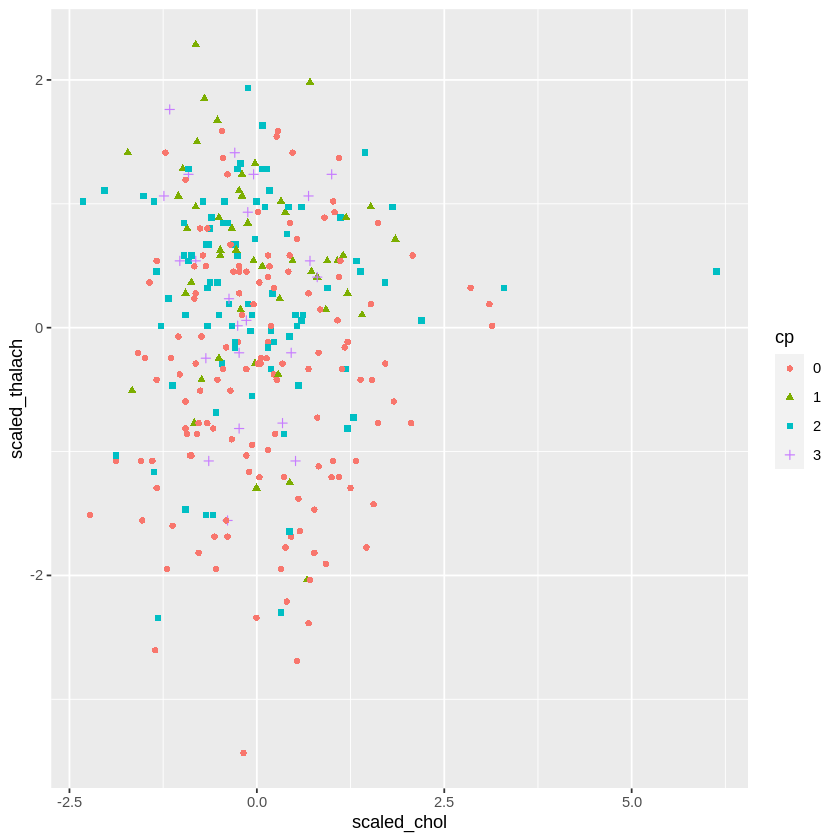

In [3]:
thalach_vs_chol_plot <- ggplot(heart_disease_scaled, aes(x=scaled_chol, y=scaled_thalach,color=cp, shape=cp)) + geom_point()
thalach_vs_chol_plot

In [4]:
heart_disease_split <- initial_split(heart_disease, prop = 0.5, strata = cp)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split) # No Answer - remove if you provide an answer
heart_disease_train
heart_disease_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_disease_recipe <- recipe(cp ~ chol + thalach , data = heart_disease_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors()) 
heart_disease_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()